In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    recall_score,
    roc_auc_score,
    roc_curve
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import shap

In [2]:
# Seed and init
np.random.seed(101)
shap.initjs()

# Show all columns
pd.set_option('display.max_columns', None)

# Load and clean data
df = pd.read_csv(r"C:\Users\dzinyela_1\Downloads\Zakari\Personal_Household_Cleaned_ready.csv")

df.drop([
    'Household_Size_2',
    'Household_Size_3',
    'Household_Size_Above 3',
    'No_Vehicles _Owned',
    'Driving_licence_Yes',
    'Currently_Edu_Basic school_Yes',
    'Currently_Edu_Not Edu_Yes',
    'Age_less_equal_15',
    'Cell_phone_Yes_with Int.',
    'household_Head_Yes',
    'Age_less_equall_51',
    'Age_less_equall_to_31',
    'Vehicle_Access_Yes'
], axis=1, inplace=True)


In [3]:
# Features and target
X = df.drop('Switch_BRT_Yes', axis=1)
y = df['Switch_BRT_Yes']
X_display = X.copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [4]:
# Model training
model = LogisticRegression(penalty="l2", C=0.1, solver='liblinear')
model.fit(X_train, y_train)

# Predictions
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)


In [5]:
# Evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[  2  82]
 [  1 839]]


In [6]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.02      0.05        84
           1       0.91      1.00      0.95       840

    accuracy                           0.91       924
   macro avg       0.79      0.51      0.50       924
weighted avg       0.89      0.91      0.87       924



In [7]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC Score: {auc_score:.4f}")



Accuracy: 0.9102
Recall: 0.9988
AUC Score: 0.7612


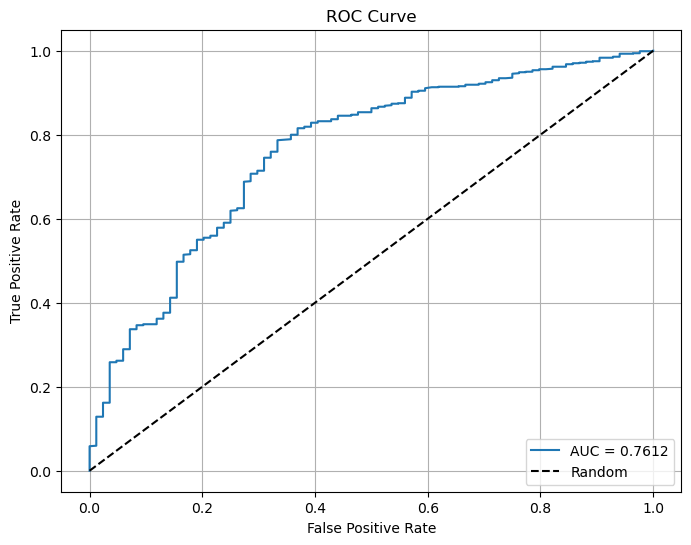

In [8]:

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [9]:
# SHAP analysis
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

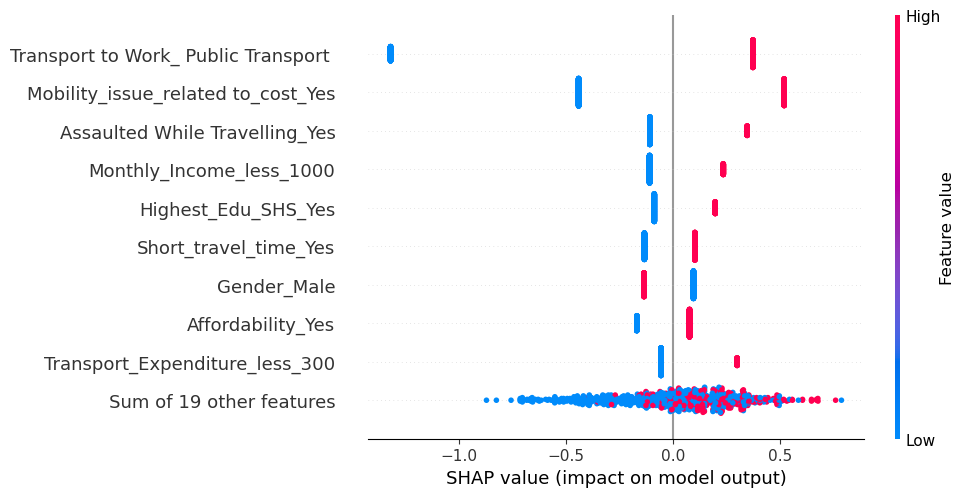

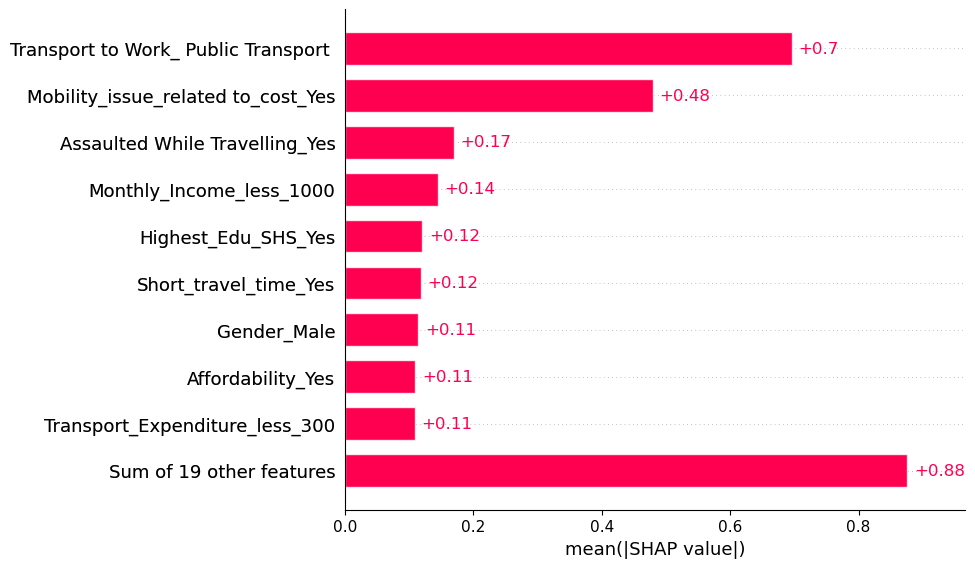

In [10]:
# SHAP summary plots
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

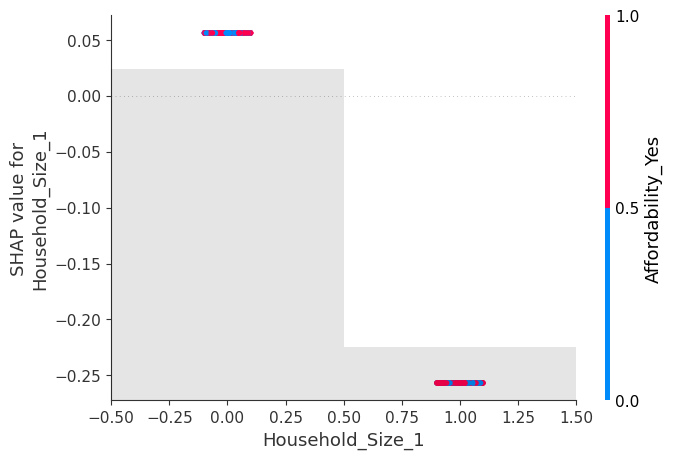

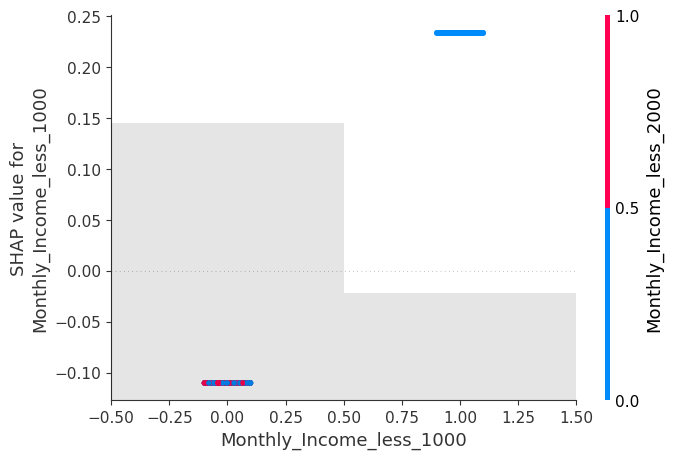

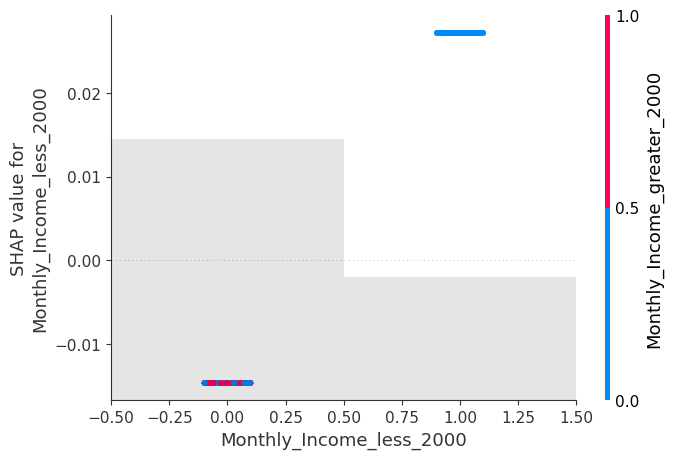

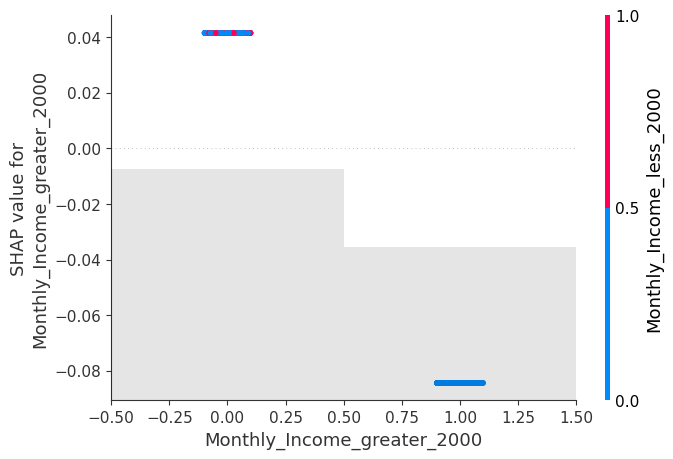

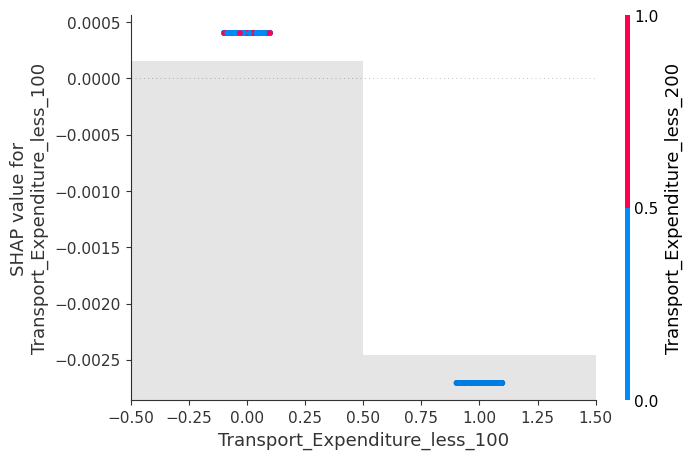

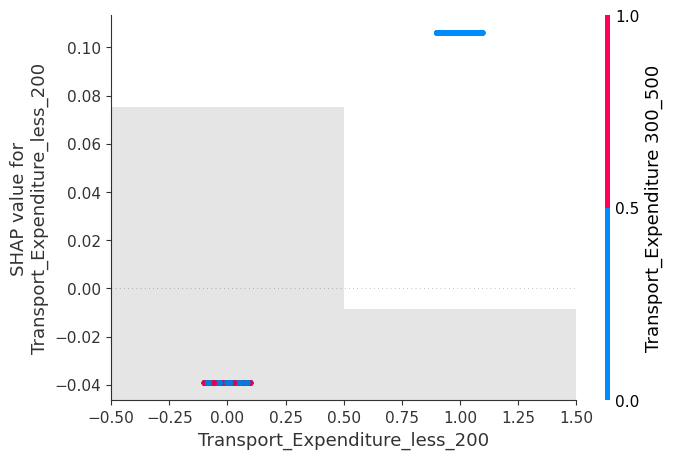

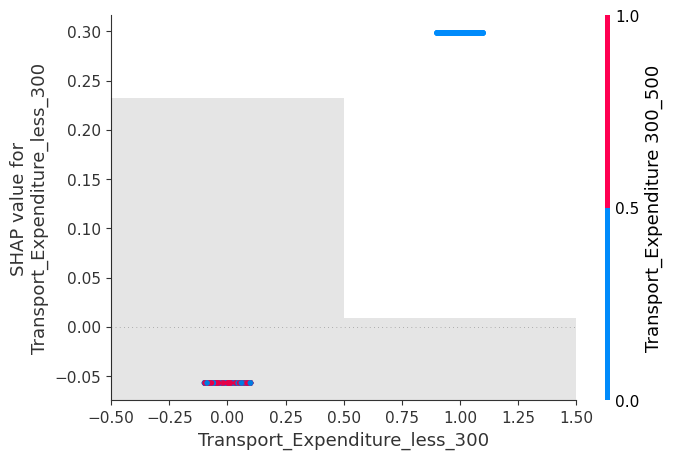

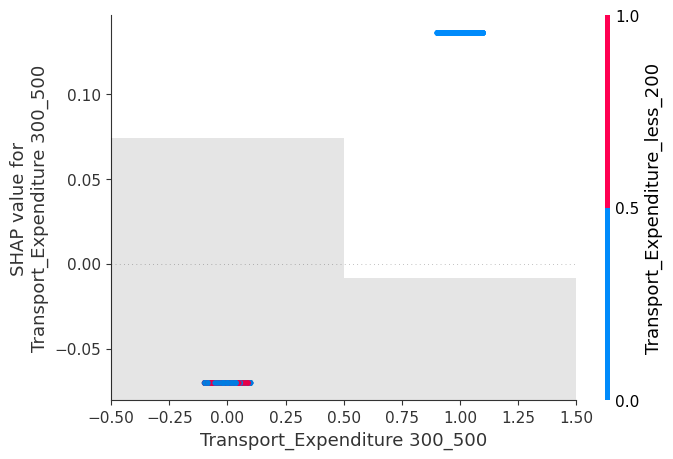

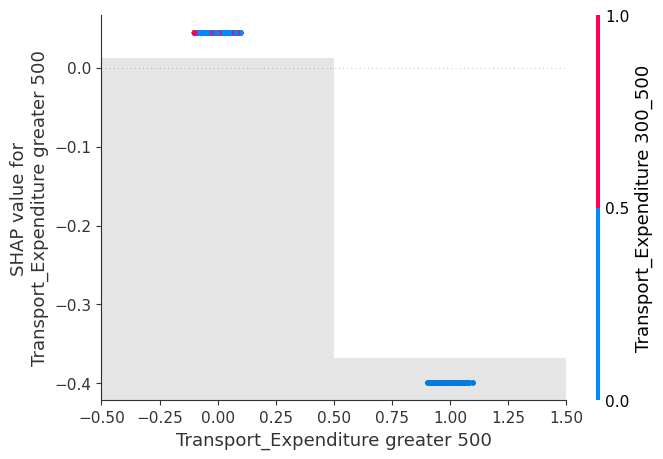

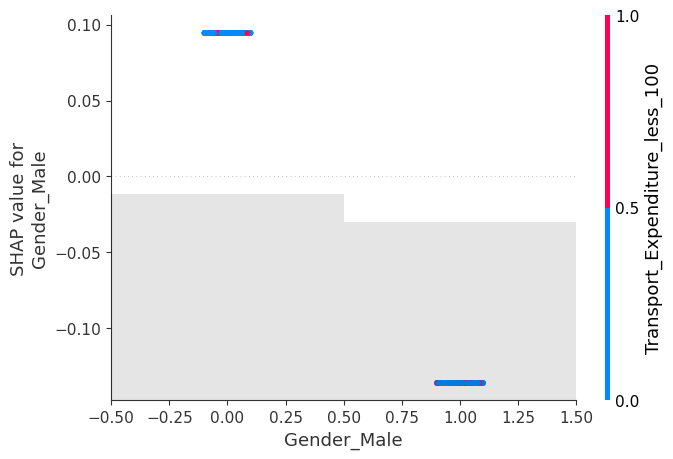

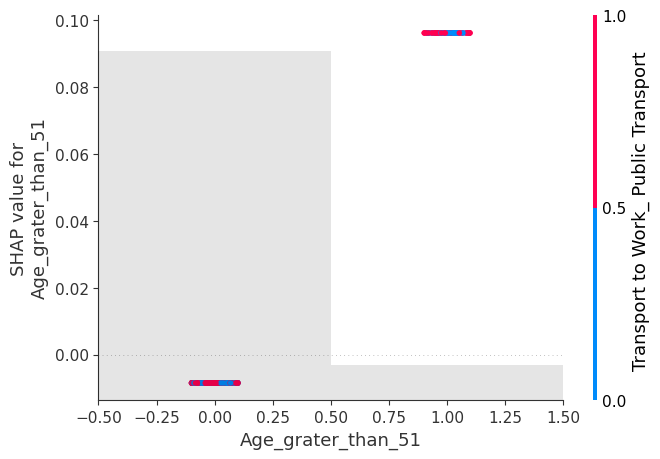

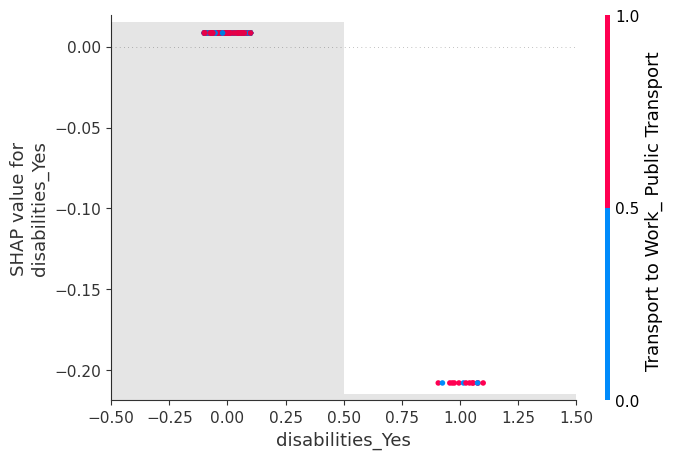

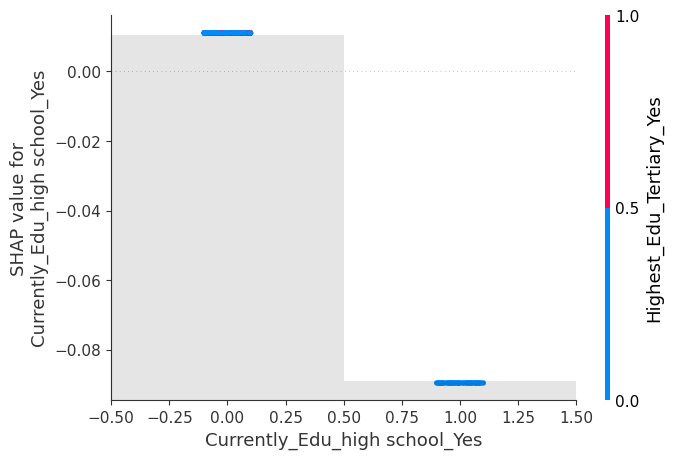

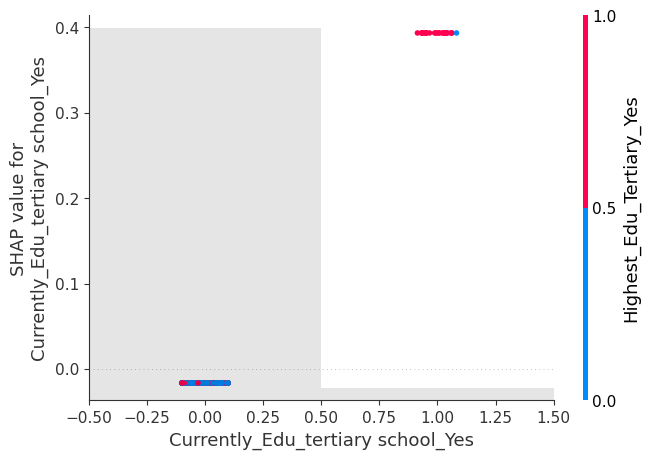

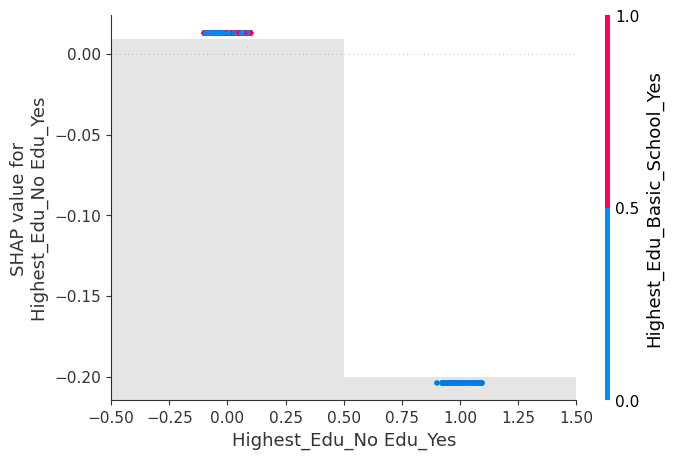

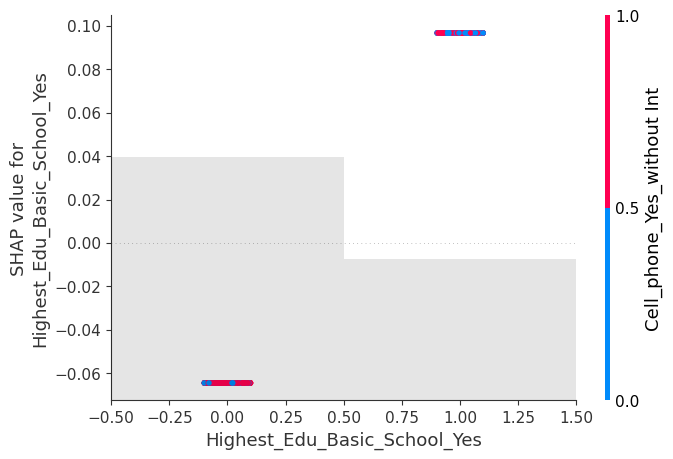

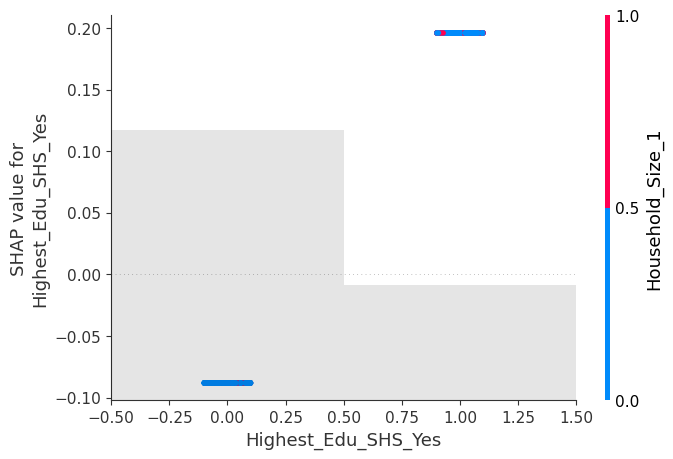

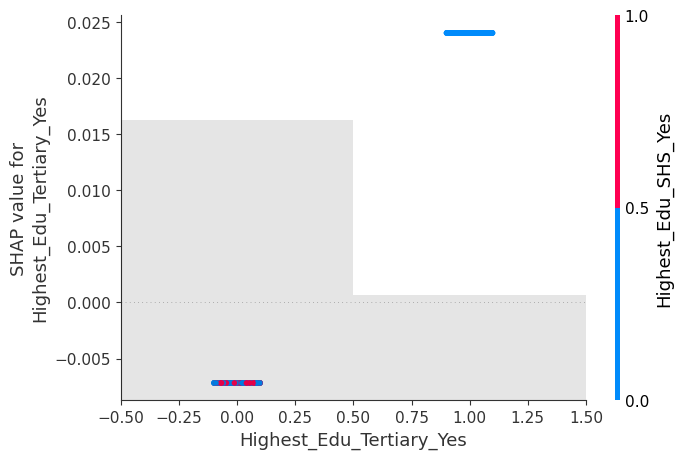

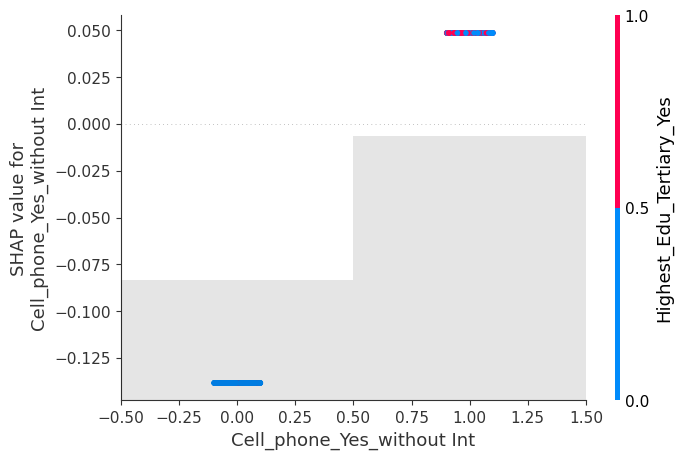

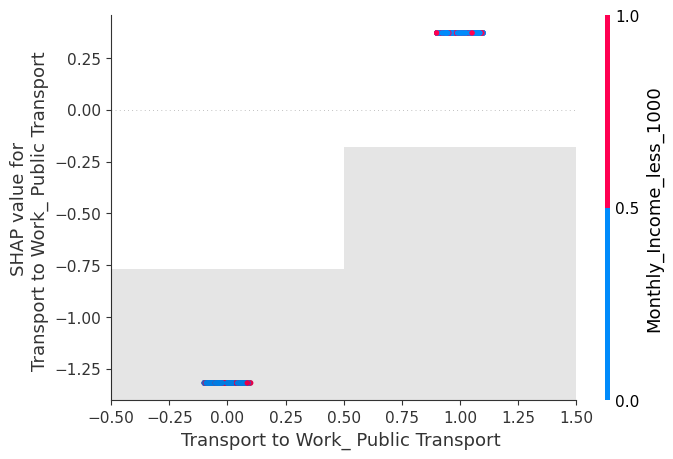

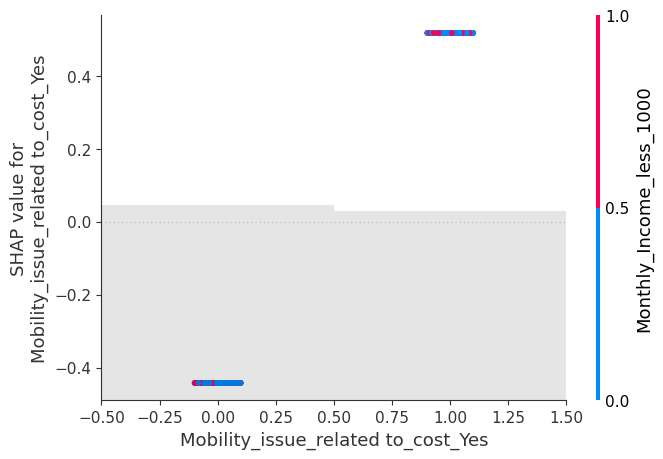

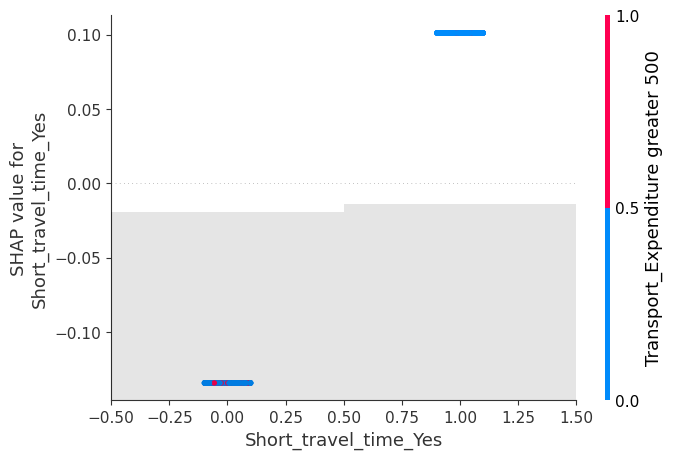

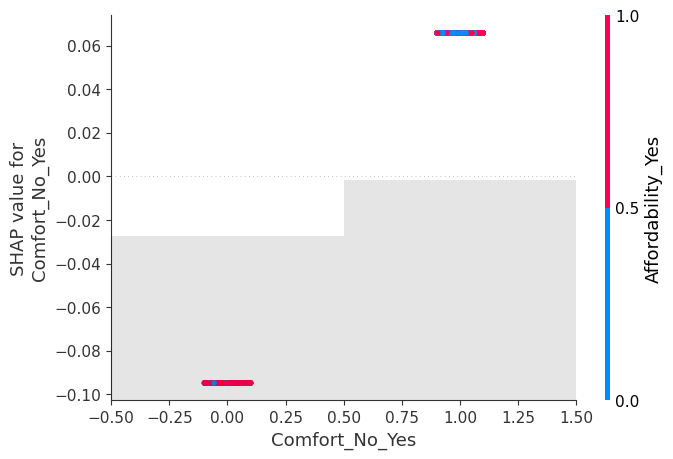

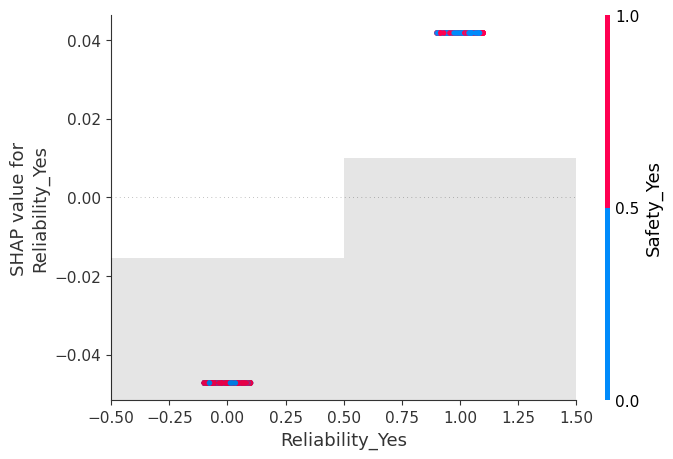

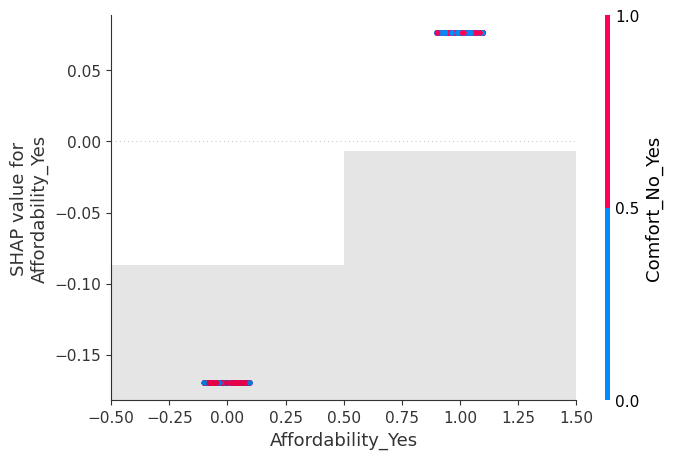

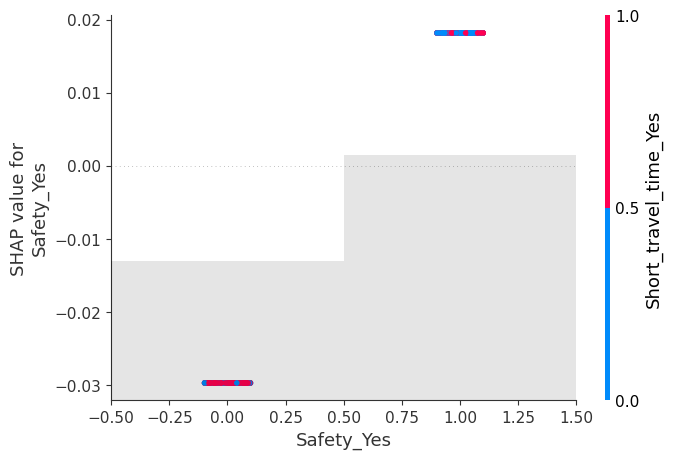

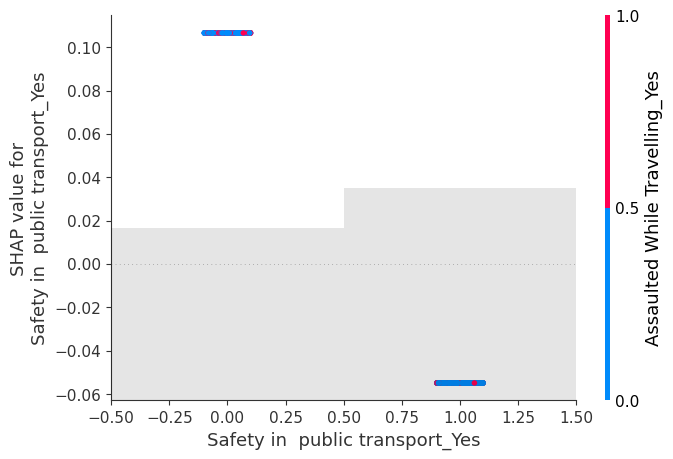

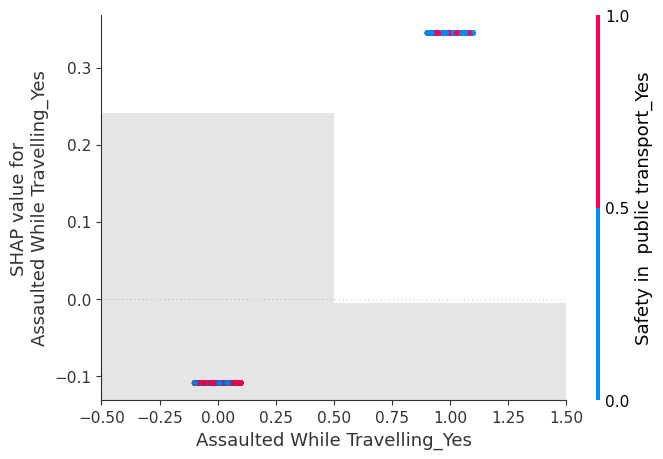

In [11]:
# SHAP dependence plots
for feature in X.columns:
    shap.plots.scatter(shap_values[:, feature], color=shap_values)

### Include SMOTE

In [13]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    recall_score,
    roc_auc_score,
    roc_curve
)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
import shap

In [16]:
# Seed and SHAP JS init
np.random.seed(101)
shap.initjs()

# Show all columns
pd.set_option('display.max_columns', None)

# Load and clean data
df = pd.read_csv(r"C:\Users\dzinyela_1\Downloads\Zakari\Personal_Household_Cleaned_ready.csv")

df.drop([
    'Household_Size_2',
    'Household_Size_3',
    'Household_Size_Above 3',
    'No_Vehicles _Owned',
    'Driving_licence_Yes',
    'Currently_Edu_Basic school_Yes',
    'Currently_Edu_Not Edu_Yes',
    'Age_less_equal_15',
    'Cell_phone_Yes_with Int.',
    'household_Head_Yes',
    'Age_less_equall_51',
    'Age_less_equall_to_31',
    'Vehicle_Access_Yes'
], axis=1, inplace=True)

In [17]:
# Features and target
X = df.drop('Switch_BRT_Yes', axis=1)
y = df['Switch_BRT_Yes']
X_display = X.copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [18]:
# Train logistic regression model
model = LogisticRegression(penalty="l2", C=0.1, solver='liblinear')
model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

In [19]:
# Evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 55  40]
 [115 714]]


In [20]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.58      0.42        95
           1       0.95      0.86      0.90       829

    accuracy                           0.83       924
   macro avg       0.64      0.72      0.66       924
weighted avg       0.88      0.83      0.85       924



In [21]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)

In [22]:
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC Score: {auc_score:.4f}")


Accuracy: 0.8323
Recall: 0.8613
AUC Score: 0.7680


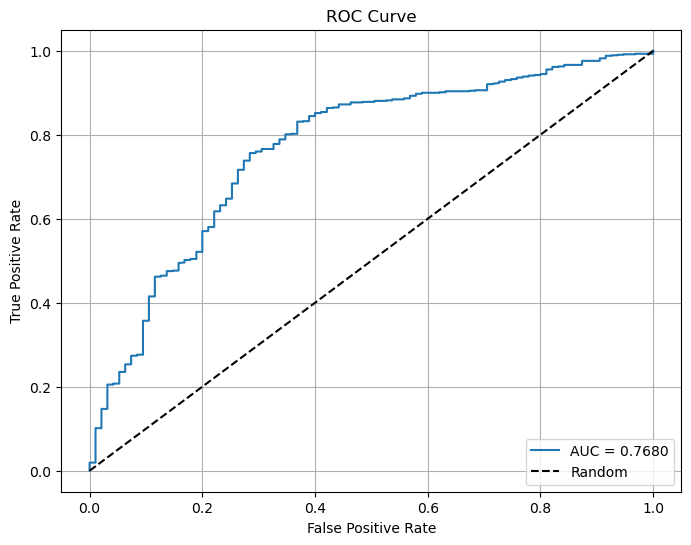

In [23]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [24]:
# SHAP analysis
explainer = shap.Explainer(model, X_train_resampled)
shap_values = explainer(X_test)


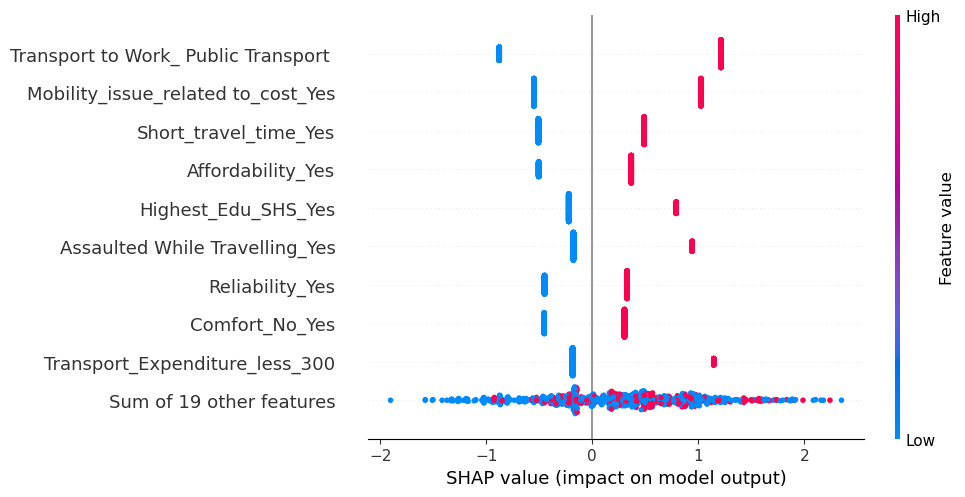

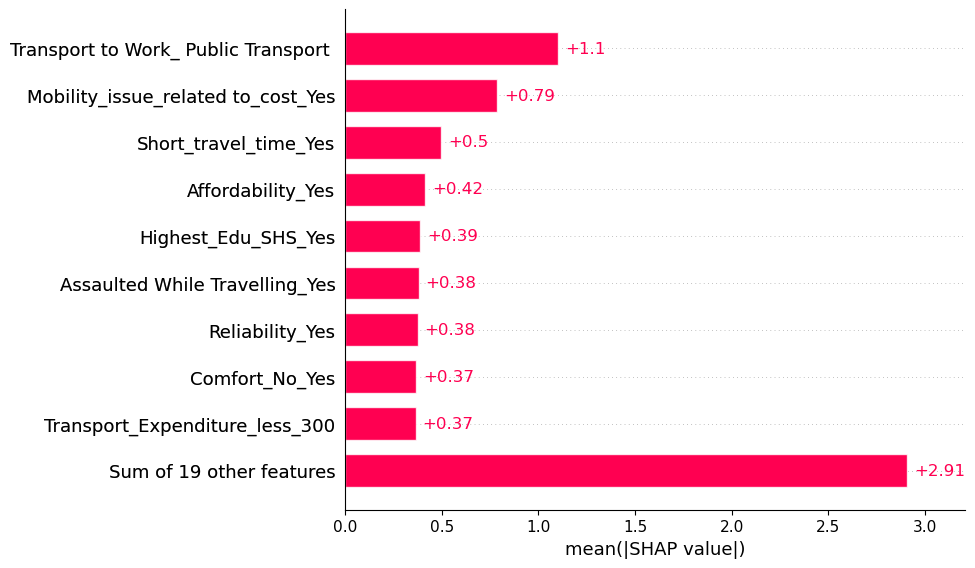

In [25]:
# SHAP summary plots
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

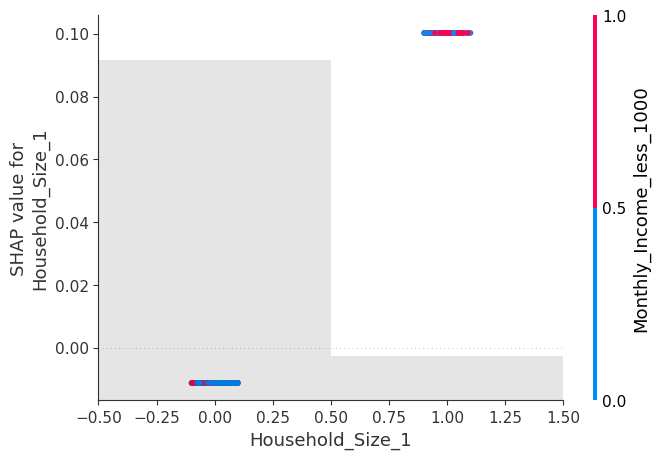

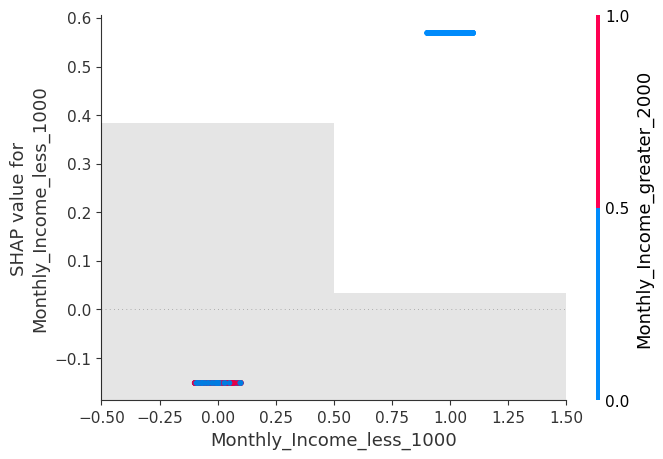

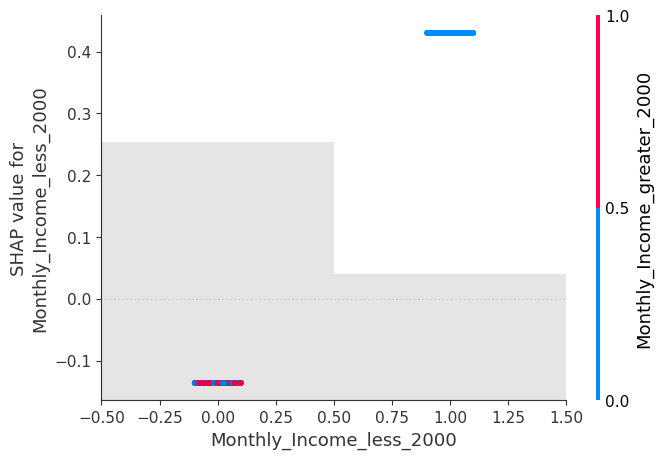

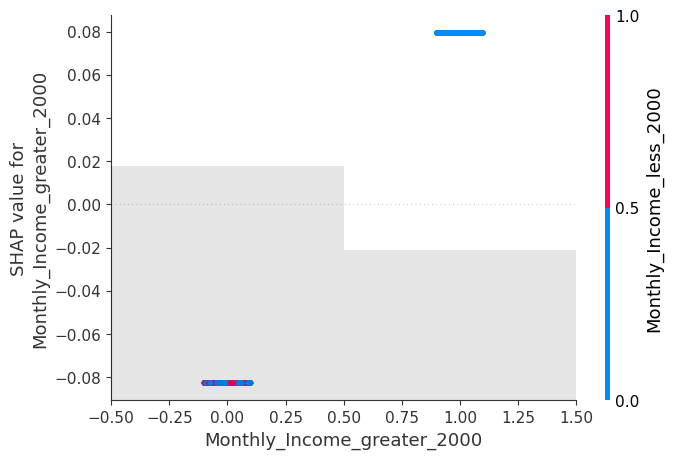

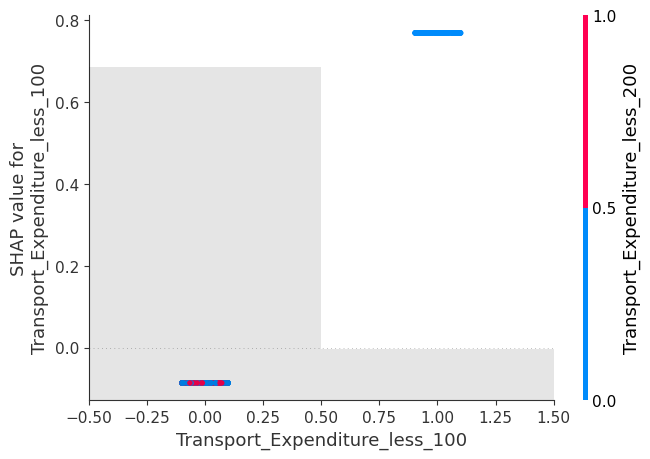

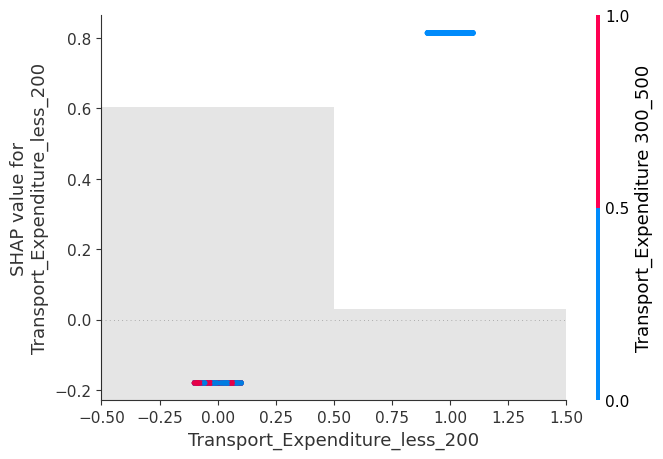

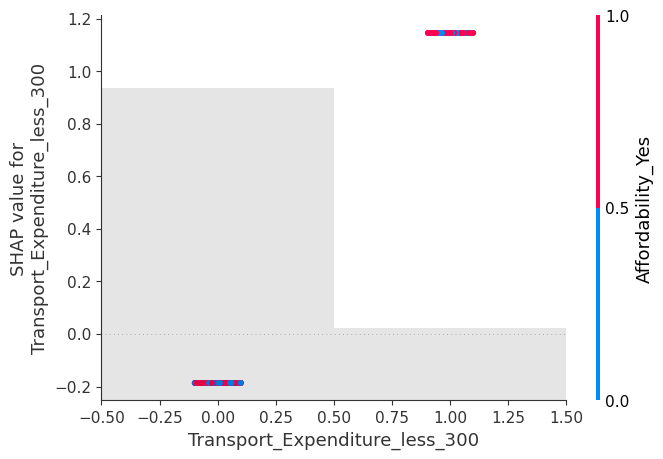

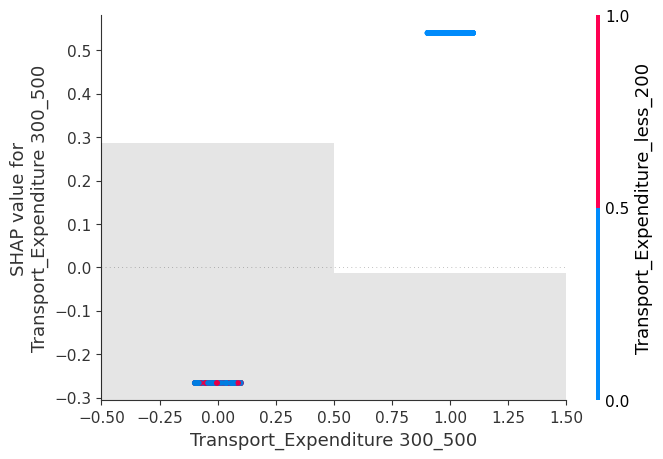

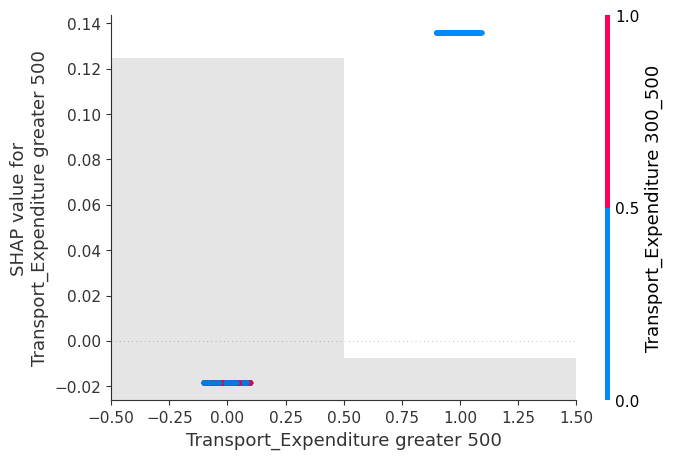

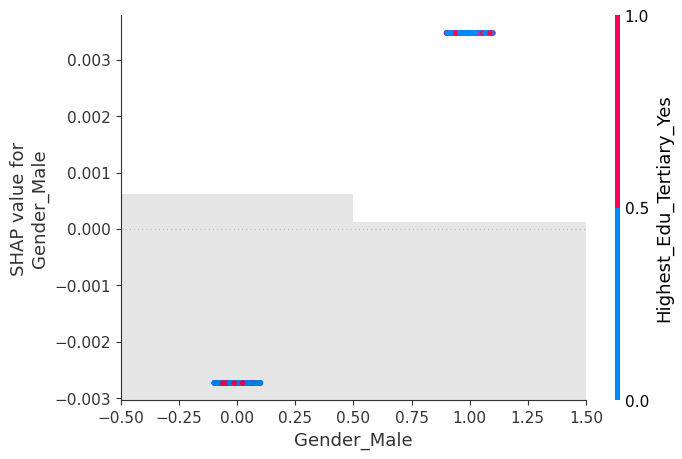

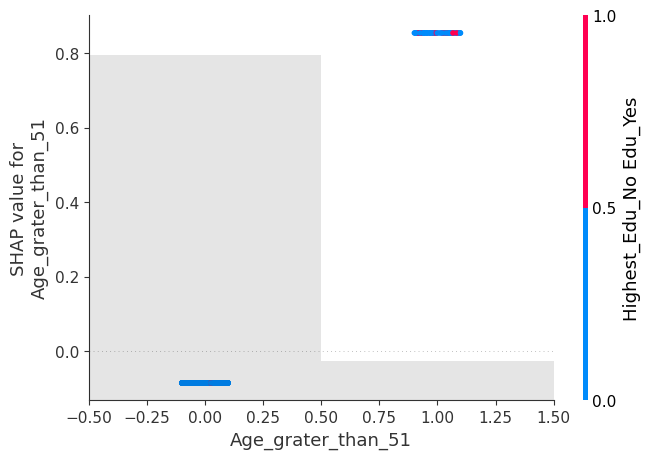

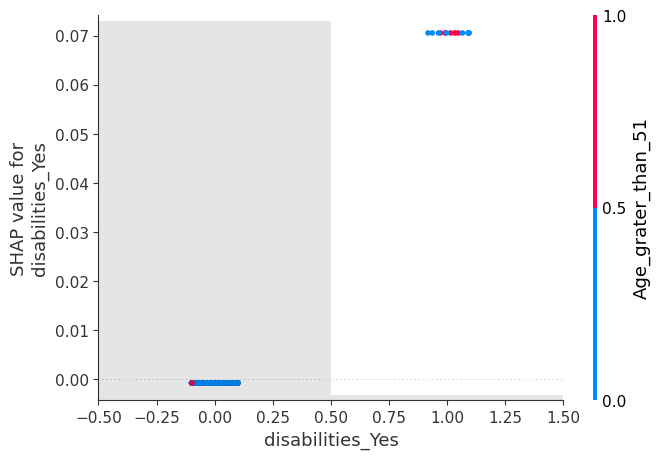

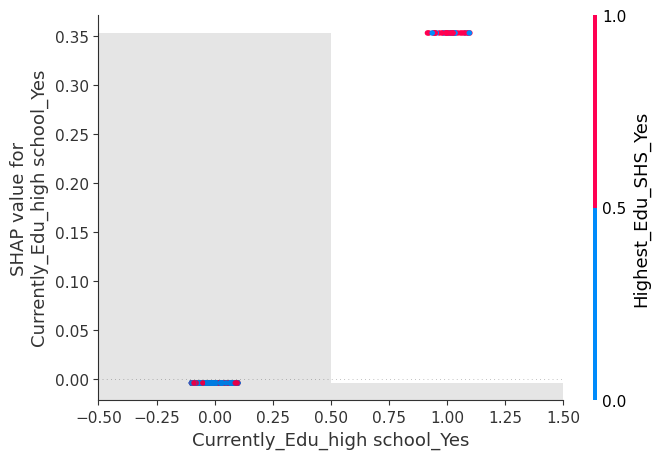

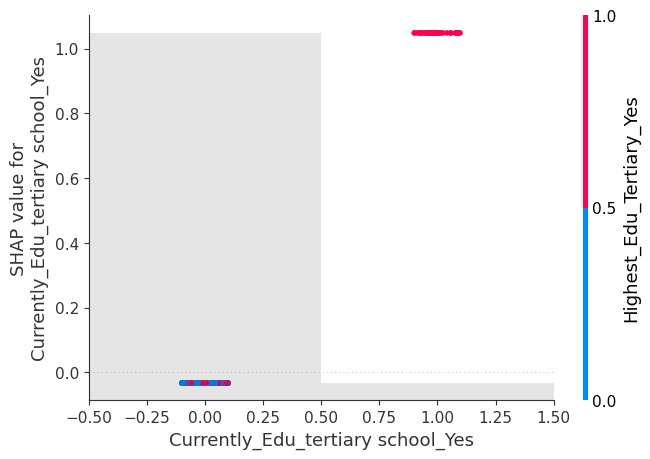

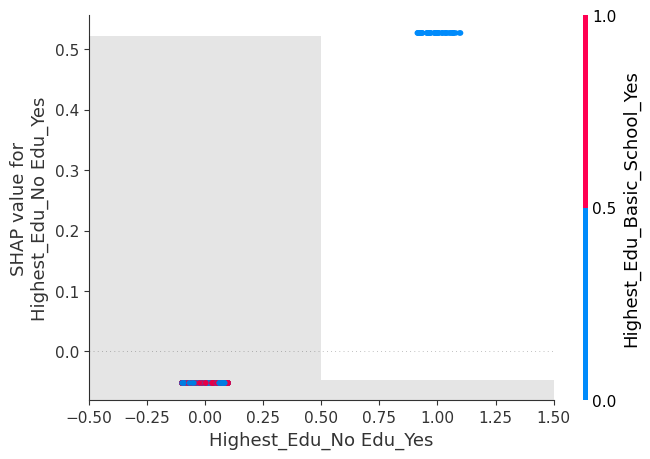

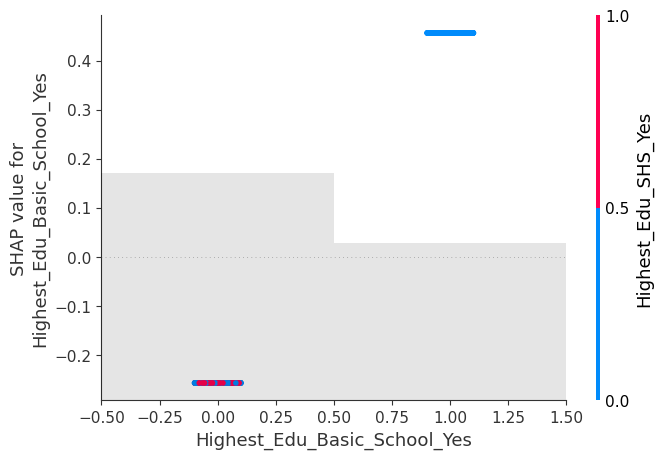

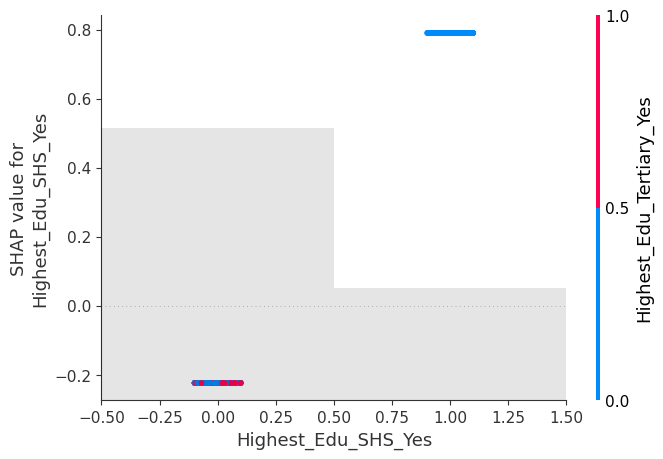

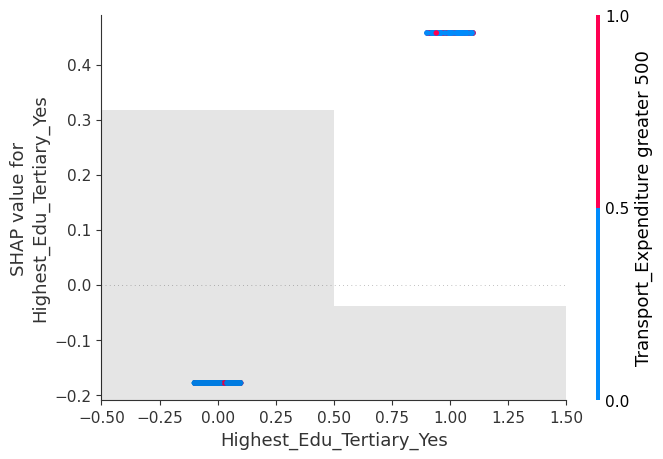

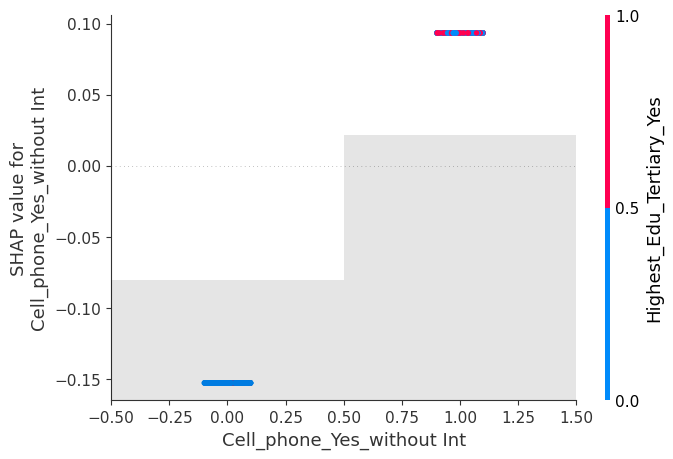

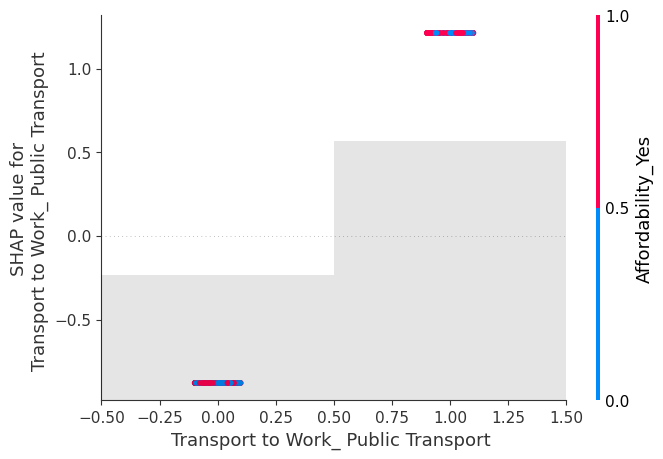

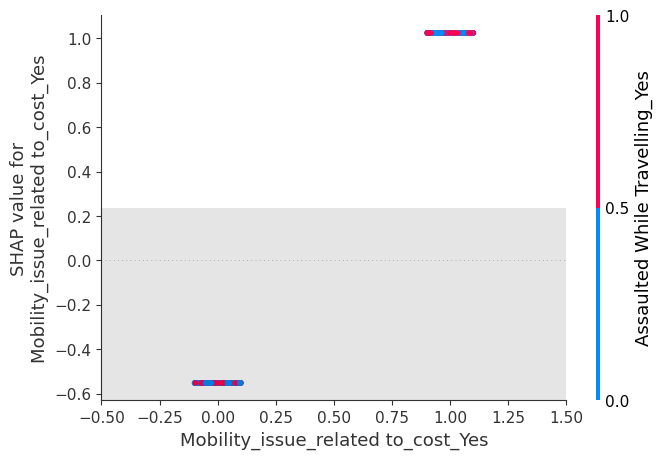

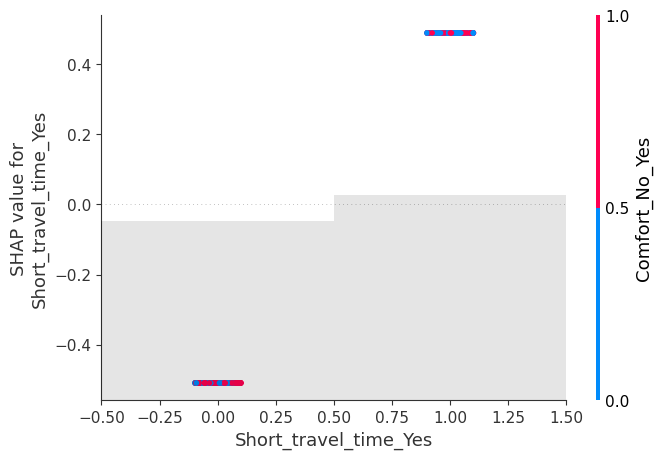

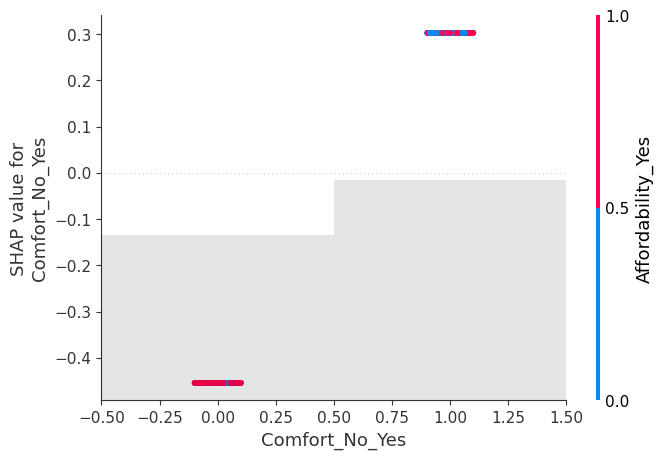

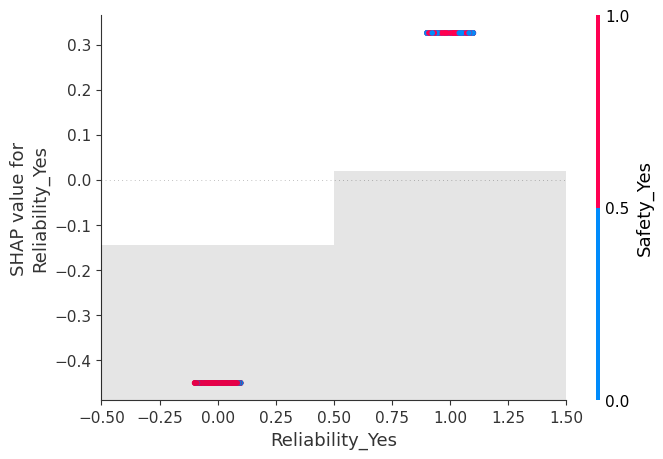

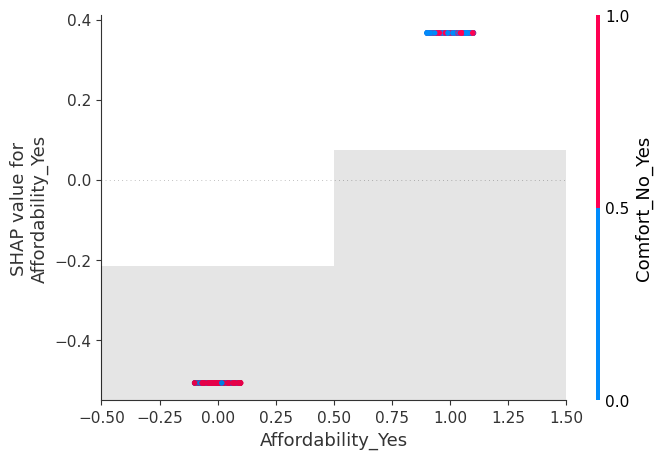

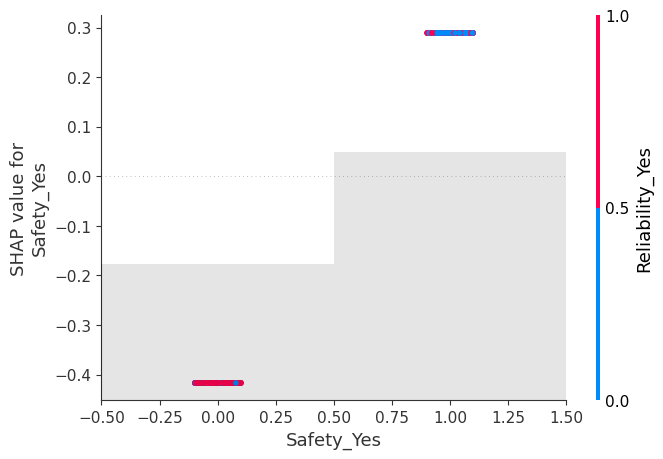

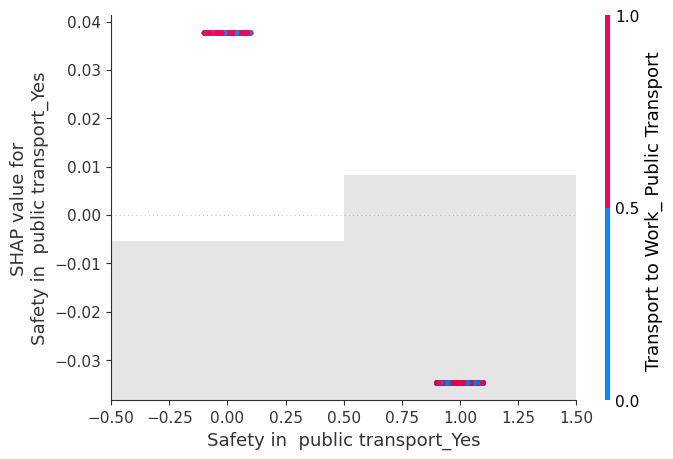

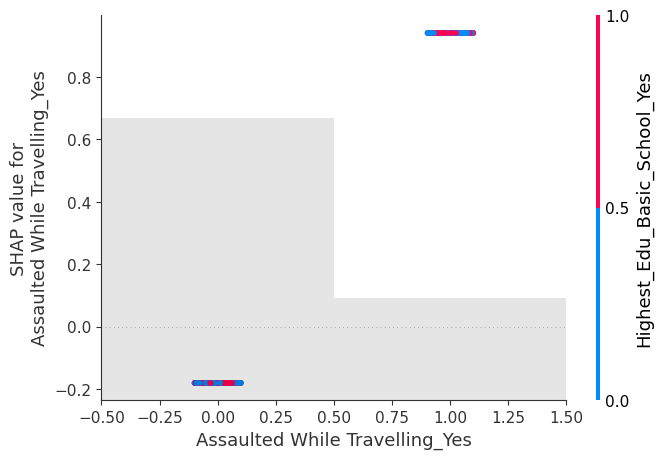

In [26]:
# SHAP dependence plots
for feature in X.columns:
    shap.plots.scatter(shap_values[:, feature], color=shap_values)